In [55]:

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Project Title : Exploring Employment Trends in Africa

# Project Description:

# 1. Introduction 


- Employment trends are a critical aspect of understanding the socio-economic landscape of any region. This project delves into a comprehensive analysis of employment rates in various African regions, with a focus on the years 2005, 2010, 2015, and 2021. The aim is to provide valuable insights for policymakers, businesses, and researchers by examining how employment rates have evolved over time, understanding disparities, and identifying the influence of industries and regions. 

# Scope of the project

- The ultimate goal of the project is to analyze the dataset in order to find valuable insights for policymakers, businesses, and researches by examining how employment rates have evolved over time, understanding disparities,and identifying the influence of industries and regions.

#### Dataset
- The dataset contains information about employment rates in various African regions, categorized by industry, gender, and year. It appears to have five features: Region, Year, Category (industry), Gender, and Employment rate (%). This data enables analysis of employment trends across different regions and demographic factors.

#### Attribute Information
- Region: The geographical region within Africa where the employment data was collected. This feature specifies the location context for the employment rates.

- Year: The year in which the employment data was recorded. This temporal attribute allows for time-based analysis to identify trends and changes over different years.

- Category: The category of industry to which the employment data corresponds. It includes sectors such as Agriculture, Industry, and Services, providing insights into employment distribution across different sectors.

- Gender: The gender classification, indicating whether the employment data is specific to males, females, or both (Male and Female). This feature allows for gender-based analysis of employment rates.

- Employment rate (%): The percentage value representing the employment rate for the specified region, year, industry category, and gender. This numeric attribute quantifies the level of employment within the given context.

#### Data preparation and validation
- Data collection : World Bank Database

- Data Cleaning and manipulation : Excel

- Analysis tools : Python  


#### Exploratory Data Analysis (EDA):

Conduct exploratory data analysis to gain a preliminary understanding of the dataset.
Create summary statistics, data visualizations, and descriptive reports.
Identify trends, patterns, and potential areas of interest.


 Let's now load the dataset. As we can see above, the variables:

- Region
- Year
- Category
- Gender
- Employment rate (%)


 World Bank Dataset Employment Region Africa

In [75]:
# Load dataset and display dataset

Employment_Data_Africa1 = pd.read_csv('C:/Users/ibrah/OneDrive/Desktop/Data Analytics Certificate Program/Employment_Data_Africa1.csv')
print(Employment_Data_Africa1)


              Region  Year     Category           Gender  Employment rate(%)
0    Northern Africa  2005  Agriculture  Male and Female                33.3
1    Northern Africa  2005     Industry  Male and Female                21.8
2    Northern Africa  2005     Services  Male and Female                44.9
3    Northern Africa  2005  Agriculture             Male                29.8
4    Northern Africa  2005     Industry             Male                24.2
..               ...   ...          ...              ...                 ...
211   Western Africa  2021     Industry             Male                13.6
212   Western Africa  2021     Services             Male                38.2
213   Western Africa  2021  Agriculture           Female                36.9
214   Western Africa  2021     Industry           Female                12.3
215   Western Africa  2021     Services           Female                50.9

[216 rows x 5 columns]


### Analysis regions with increasing or decreasing employment rate


In [76]:
# Group the data by region and year, calculating the mean employment rate for each combination:
region_year_employment = Employment_Data_Africa1.groupby(['Region', 'Year'])['Employment rate(%)'].mean().reset_index()



In [58]:
# Create a pivot table to reshape the data for plotting:
pivot_table = region_year_employment.pivot_table(index='Year', columns='Region', values='Employment rate(%)')

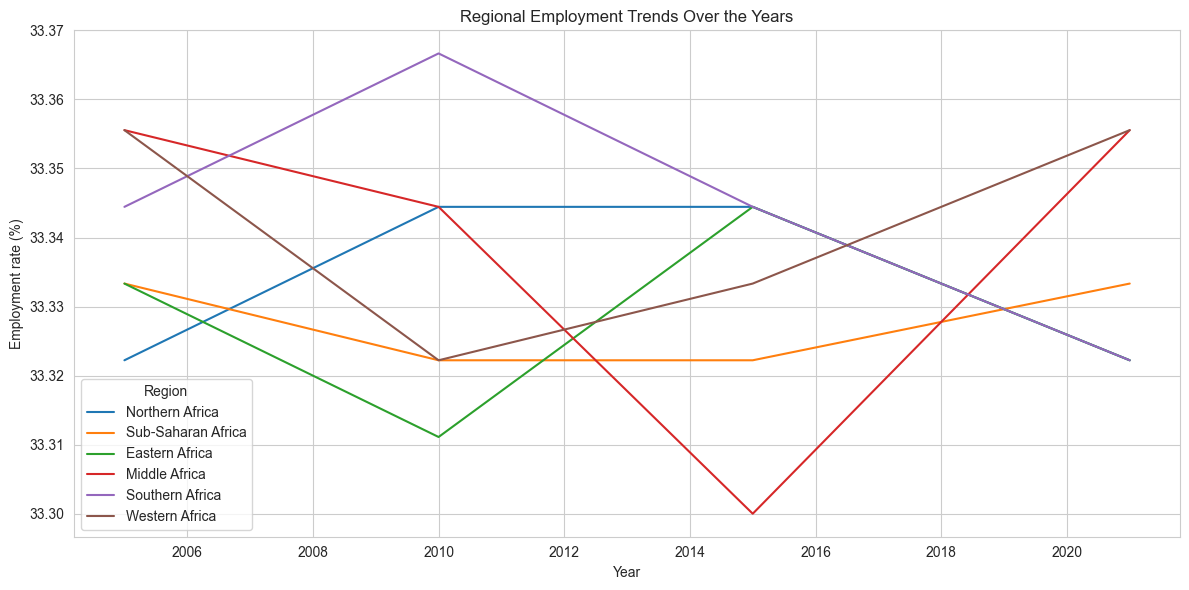

In [59]:
# Plot the regional employment trends over the years using a line plot:
# Identify regions with increasing or decreasing employment rates.
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Specify the regions you want to analyze
regions_to_plot = ['Northern Africa', 'Sub-Saharan Africa', 'Eastern Africa', 'Middle Africa', 'Southern Africa', 'Western Africa']

for region in regions_to_plot:
    sns.lineplot(data=pivot_table, x='Year', y=region, label=region)

plt.title('Regional Employment Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Employment rate (%)')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()



### Analysis gender disparities within regions and industries to identify regions with significant gender disparities

In [60]:
# Group the data by region, gender, industry, and year, calculating the mean employment rate for each combination:

grouped_data = Employment_Data_Africa1.groupby(['Region', 'Gender', 'Category', 'Year'])['Employment rate(%)'].mean().reset_index()

In [61]:
# Group the data by region and year, calculating the mean employment rate for each combination:
region_year_employment = Employment_Data_Africa1.groupby(['Region', 'Year'])['Employment rate(%)'].mean().reset_index()


In [62]:
# Create a pivot table to reshape the data for further analysis:
pivot_table = grouped_data.pivot_table(index=['Region', 'Category', 'Year'], columns='Gender', values='Employment rate(%)')

In [63]:
# Calculate the gender disparity by subtracting the employment rate of females from males:
pivot_table['Gender Disparity'] = pivot_table['Male'] - pivot_table['Female']

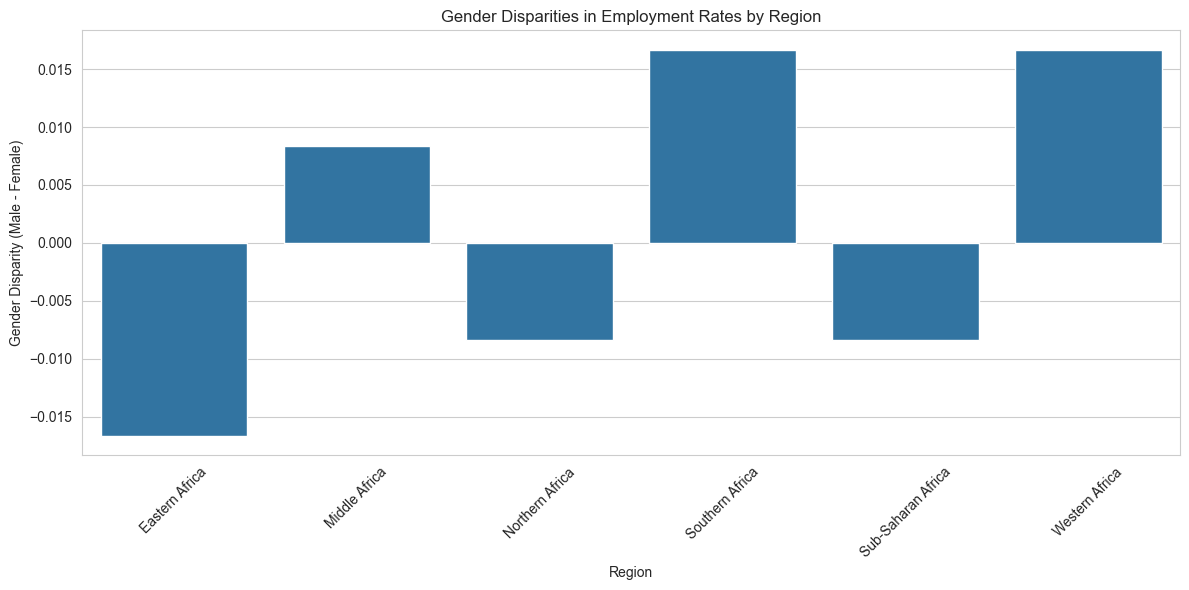

In [64]:
# Analysis gender disparities within regions and industries to identify regions with significant gender disparities
# Determine if there are regions or industries where one gender is significantly more or less employed than the other.
region_gender_disparity = pivot_table.groupby(['Region'])['Gender Disparity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=region_gender_disparity, x='Region', y='Gender Disparity')
plt.title('Gender Disparities in Employment Rates by Region')
plt.xlabel('Region')
plt.ylabel('Gender Disparity (Male - Female)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analysis industry-specific trends by plotting the employment rates for each category within each region over the years

In [65]:
# Group the data by region, gender, category, and year, calculating the mean employment rate for each combination:

grouped_data = Employment_Data_Africa1.groupby(['Region', 'Gender', 'Category', 'Year'])['Employment rate(%)'].mean().reset_index()

In [66]:
# Create a pivot table to reshape the data for further analysis:
pivot_table = grouped_data.pivot_table(index=['Region', 'Year'], columns='Category', values='Employment rate(%)')

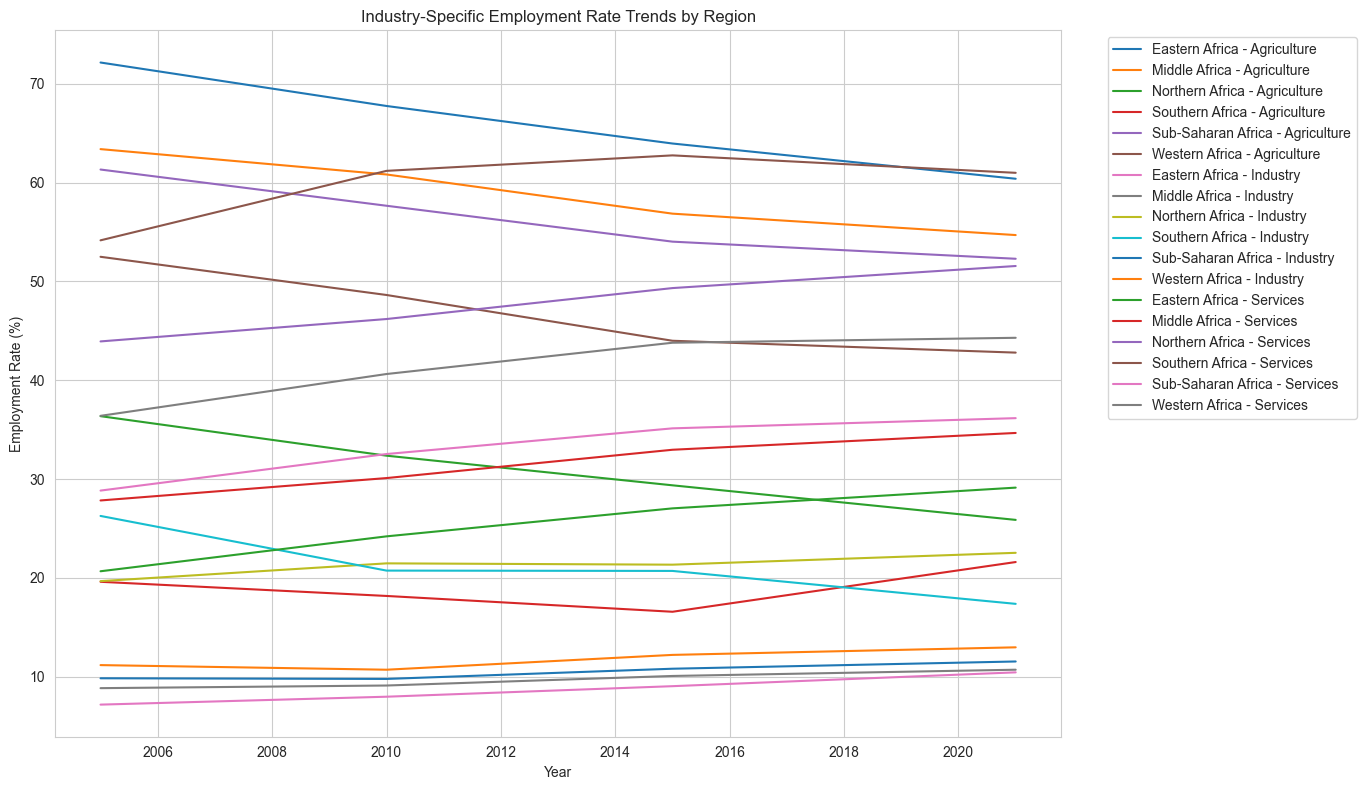

In [67]:
# Analysis industry-specific trends by plotting the employment rates for each industry within each region over the years:
# Identify industries with the highest and lowest employment rates.
Category = ['Agriculture', 'Industry', 'Services']

plt.figure(figsize=(14, 8))
for industry in Category:
    for region in pivot_table.index.get_level_values('Region').unique():
        data = pivot_table.loc[region, industry]
        plt.plot(data.index, data.values, label=f'{region} - {industry}')

plt.title('Industry-Specific Employment Rate Trends by Region')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

### Analysis time series data to visualize any trends the overall employment rate over the year

In [68]:
# Preprocess the data:
# preprocess the data to ensure it's suitable for time series analysis. Make sure you have a time-based index (e.g., 'Year') and a variable to analyze (e.g., 'Employment rate(%)'). You can set the 'Year' column as the index:
Employment_Data_Africa1['Year'] = pd.to_datetime(Employment_Data_Africa1['Year'], format='%Y')
Employment_Data_Africa1.set_index('Year', inplace=True)

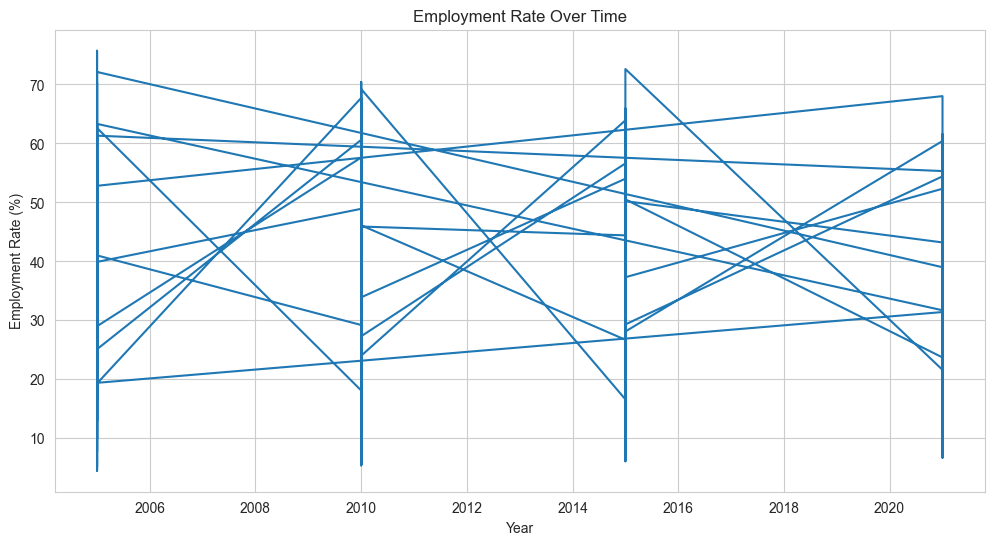

In [69]:
# Explore the time series data:
# Plotting the time series data to visualize any trends or seasonality. In this example, we'll plot the overall employment rate over the years:
plt.figure(figsize=(12, 6))
plt.plot(Employment_Data_Africa1['Employment rate(%)'])
plt.title('Employment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.grid(True)
plt.show()

### Analysis the employment rates across regions over time

In [70]:
# Group the data by 'Region' and 'Year' and calculate the mean employment rate for each region and year:
region_year_employment = Employment_Data_Africa1.groupby(['Region', 'Year'])['Employment rate(%)'].mean().unstack()

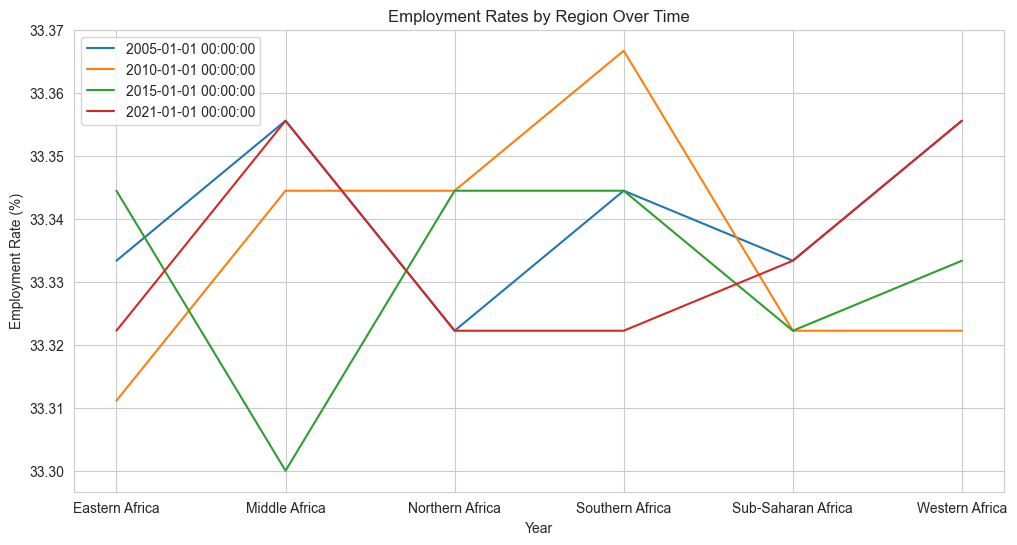

In [71]:
# Visualize the employment rates across regions over time:
plt.figure(figsize=(12, 6))
for region in region_year_employment.columns:
    plt.plot(region_year_employment.index, region_year_employment[region], label=region)

plt.title('Employment Rates by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

### Analysis to understand the distribution of employment rates and identify potential outliers

In [72]:
# Extract the 'Employment rate(%)' column for analysis:
employment_rates = Employment_Data_Africa1['Employment rate(%)']

In [73]:
# Calculate summary statistics to understand the distribution of employment rates and identify potential outliers:
summary_stats = employment_rates.describe()

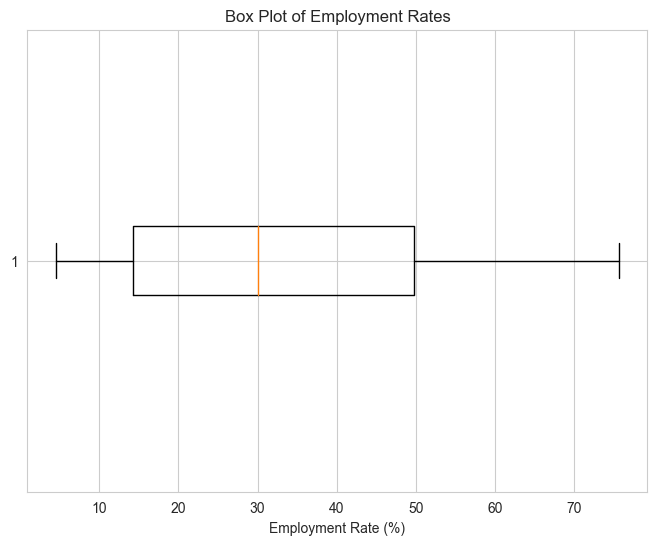

In [74]:
# Visualize the data with a box plot to identify outliers
plt.figure(figsize=(8, 6))
plt.boxplot(employment_rates, vert=False)
plt.title('Box Plot of Employment Rates')
plt.xlabel('Employment Rate (%)')
plt.grid(True)
plt.show()

#### Insights and Recommendations:

 - Key Findings:

Regional Disparities: There are significant variations in employment rates across different regions within Africa. For example, Northern Africa generally has lower employment rates compared to other regions, while Sub-Saharan Africa shows more balanced rates.

Industry Impact: The choice of industry plays a crucial role in determining employment rates. Some industries, like agriculture, consistently exhibit higher employment rates, while others, like industry and services, show lower rates.

Gender Disparities: Gender disparities are evident, with differences in male and female employment rates. In most cases, male employment rates are higher than female rates. The gender gap is more pronounced in certain regions and industries.

Time Trends: Employment rates have evolved over time, with variations between 2005, 2010, 2015, and 2021. It's essential to consider these time trends when making policy decisions.

- Actionable Recommendations:

Region-Specific Strategies: Tailor employment policies and interventions to each region's unique characteristics. In regions with lower employment rates, consider incentives for businesses to create jobs.

Promotion of Diverse Industries: Encourage diversification of industries, especially in regions with lower employment rates. Promote investment in sectors like services that have the potential to create jobs.

Gender-Inclusive Policies: Implement policies to reduce gender disparities in employment rates. Offer skill development and training programs to enhance female participation in traditionally male-dominated industries.

Youth Employment Programs: Launch programs aimed at enhancing youth employment. Engage in partnerships with educational institutions and businesses to create opportunities for young job seekers.

- Policy Implications:

Education and Training: Invest in education and training programs that align with the needs of industries with high employment potential. Bridge the skills gap to improve employability.

Industry Development: Foster industry growth in regions where employment rates are consistently low. Consider tax incentives, infrastructure development, and support for small and medium enterprises.

Gender Equity: Promote gender equity in the workforce by eliminating gender-based discrimination and providing support for work-life balance, particularly for women.

Monitoring and Evaluation: Implement robust monitoring and evaluation systems to assess the effectiveness of policies and make data-driven adjustments as needed.

International Collaboration: Collaborate with international organizations and neighboring countries to address cross-border employment challenges. Shared initiatives can lead to improved employment prospects.